In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import os
import json
from scipy import stats
import codecs



In [4]:
data_analyze = {}
folder_path = 'data'
folder_images = 'image'

In [5]:
def pre_process_scores(df_score_raw):
    # Loại bỏ hàng đầu tiên và các giá trị 'Chưa làm'
    df_score = df_score_raw.iloc[1:]
    df_score = df_score[df_score['score'] != 'Chưa làm']
    
    # Chuyển đổi kiểu dữ liệu của cột 'score' từ chuỗi sang số float
    df_score['score'] = df_score['score'].astype(float)
    
    # Định nghĩa hàm tùy chỉnh để chia cho 10 và làm tròn theo quy tắc đã nêu
    def custom_round(value):
        value = value / 10
        decimal_part = value - int(value)
        if decimal_part > 0.25 and decimal_part < 0.75:
            return int(value) + 0.5
        elif decimal_part >= 0.75:
            return int(value) + 1
        else:
            return int(value)
    
    # Áp dụng hàm tùy chỉnh vào cột 'score'
    df_score['score'] = df_score['score'].apply(custom_round)
    
    # Reset chỉ số index và xoá cột index cũ
    df_score.reset_index(drop=True, inplace=True)
    
    return df_score




In [29]:
def process_and_save_plot(df_temp, file_path, save_path):
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    print(11111)
        
    #Thong ke diem và so lan xuat hien
    thong_ke = df_temp.value_counts().sort_index()
    thong_ke = thong_ke.rename_axis('score').reset_index(name='number_appearance')
    total_score=thong_ke['number_appearance'].sum()
    plt.figure(figsize=(10, 6))
    
    ax = sns.barplot(x='score', y='number_appearance', data=thong_ke, color='skyblue')
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 10), 
                    textcoords = 'offset points')



    file_path_fix = file_path[:-4].rsplit('\\', 1)[-1]
    print(file_path_fix)
    plt.title(f'Biểu đồ phân phối điểm của môn {file_path_fix}')
    plt.xlabel('Điểm')
    plt.ylabel('Số lần xuất hiện')
    
    plt.savefig(os.path.join(save_path, f'{file_path_fix}.jpg'))
    
    #Tim diem cao nhat, thap nhat va so lan xuat hien cua no
    max_score = thong_ke['score'].max()
    max_score_frequency = thong_ke.loc[thong_ke['score'].idxmax(), 'number_appearance']
    min_score = thong_ke['score'].min()
    min_score_frequency = thong_ke.loc[thong_ke['score'].idxmin(), 'number_appearance']
    
    #Diem co so lan xuat hien nhieu nhat, va diem do
    highest_appearances = thong_ke.loc[thong_ke['number_appearance'].idxmax(), 'number_appearance']
    score_highest_appearances = thong_ke[thong_ke['number_appearance'] == highest_appearances]['score'].values
    
    
    second_max_appearances = thong_ke[thong_ke['number_appearance'] < highest_appearances]['number_appearance'].max()
    second_max_score_row = thong_ke[thong_ke['number_appearance'] == second_max_appearances]
    
    
    #So luong diem > 8
    total_scores_above_eight = (thong_ke[thong_ke['score'] >= 8]['number_appearance']).sum()
    total_scores_below_four = (thong_ke[thong_ke['score'] <=4]['number_appearance']).sum()
    
    #Tinh so lan xuat hien trung binh
    mean_appearances = int(thong_ke['number_appearance'].mean())
    
    #Diem trung binh
    mean_score = round((thong_ke['score'] * thong_ke['number_appearance']).sum() / total_score, 1)
    
    #Tinh trung vi
    median_score = round(thong_ke['score'].median(), 1)
    
    #Xac dinh cot co gia tri bat thuong
    
    score_abnormal_appearances = thong_ke[(thong_ke['number_appearance'] > (mean_appearances * 2)) | (thong_ke['number_appearance'] < mean_appearances / 3)]['score'].values
    
    
    
    
    data_analyze[file_path_fix] = {
        'total_score': int(total_score),
        'total_scores_above_eight': int(total_scores_above_eight),
        'total_scores_below_four': int(total_scores_below_four),
        'max_score': max_score,
        'max_score_frequency': int(max_score_frequency),
        'min_score': min_score,
        'min_score_frequency': int(min_score_frequency),
        'highest_appearances': int(highest_appearances),
        'score_highest_appearances': list(score_highest_appearances),
        'score_abnormal_appearances': list(score_abnormal_appearances),
        'mean_appearances': mean_appearances,
        'mean_score': mean_score,
        'median_score': median_score
        
    }
        
    with open('summary.json', 'w') as file:
        json.dump(data_analyze, file)

In [30]:
def process_csv_files_in_folder(folder_path):
    for root, dirs, files in os.walk(folder_path):
        for file_name in files:
            if file_name.endswith('.csv'):
                file_path = os.path.join(root, file_name)
                process_single_csv(file_path)

def process_single_csv(file_path):
    df = pd.read_csv(file_path)

    df_score_raw = df[['Điểm quy đổi']].rename(columns={'Điểm quy đổi': 'score'})
    df_score = pre_process_scores(df_score_raw)
    process_and_save_plot(df_score,file_path, folder_images)

11111
IT1110E-kip1-20222
19
11111
IT3020-kip1-20231
32
11111
IT3020-kip2-20231
21
11111
IT3020-kip3-20221
36
11111
IT3020-kip4-20222
29


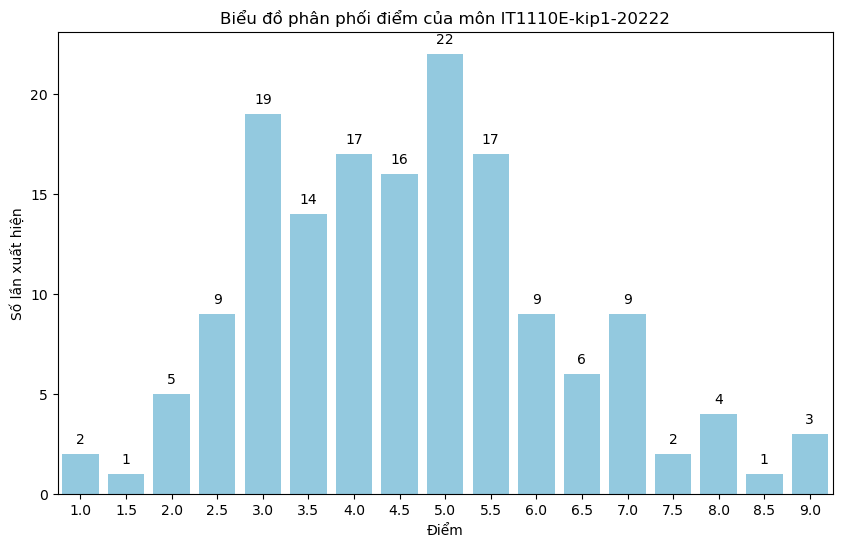

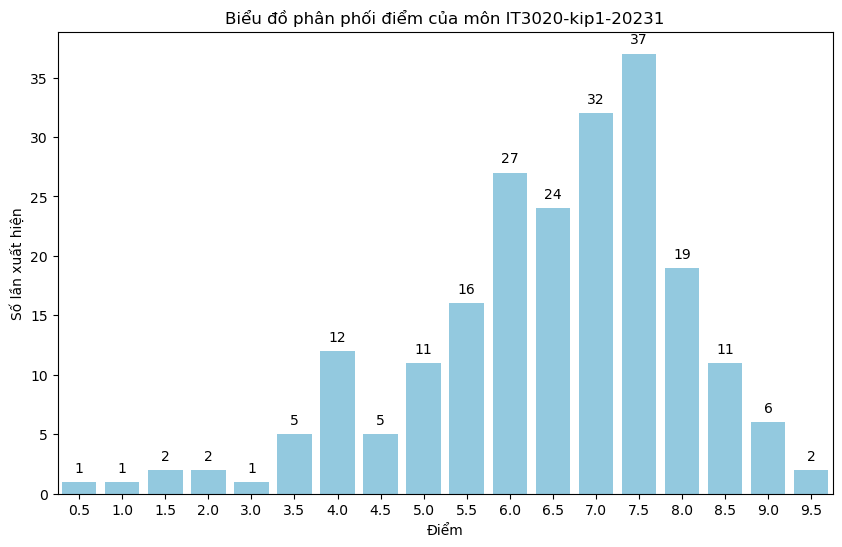

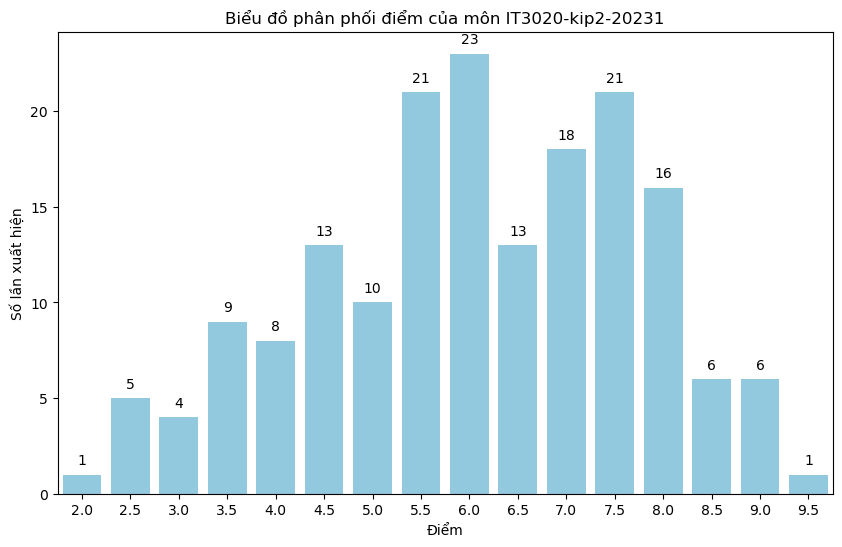

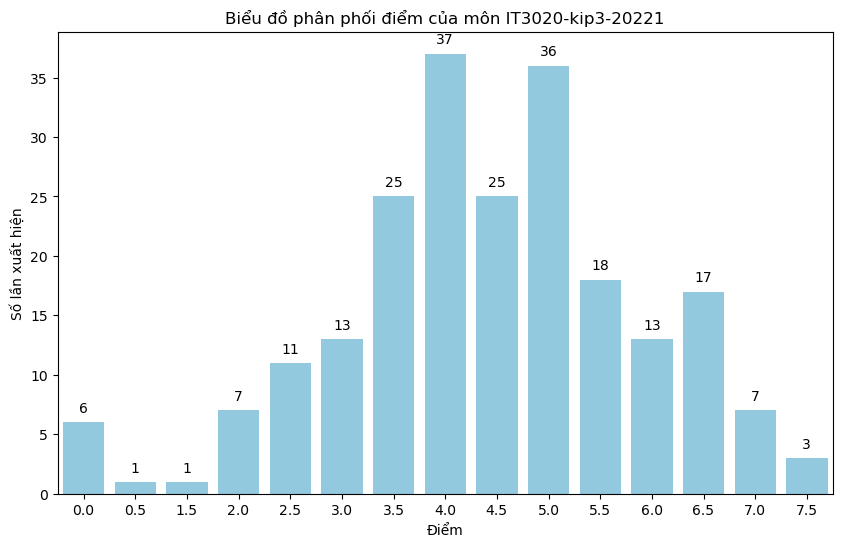

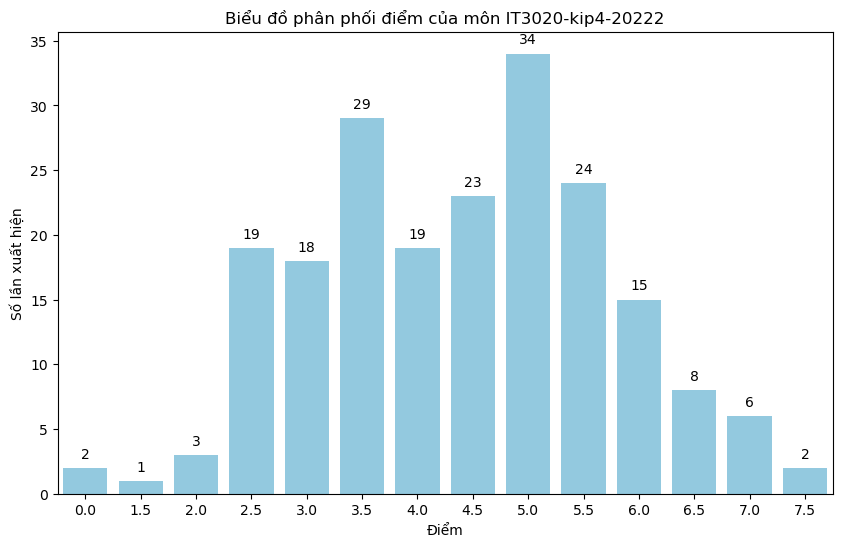

In [31]:
process_csv_files_in_folder(folder_path)